In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [56]:
df = pd.read_csv('D:/datasets/Churn_task.csv')

In [57]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


7043

In [58]:
#the data has no null values
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
df.drop('customerID', axis = 1, inplace = True)    

In [60]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [61]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [62]:
#since the null values are only in 11 rows so we could drop those rows as the data is large
df = df.dropna(how = 'any')

In [63]:
df.shape

(7032, 20)

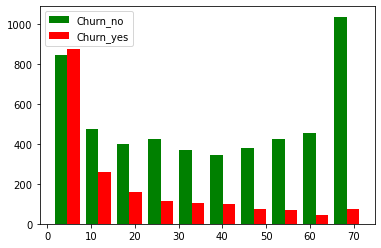

In [69]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure
plt.hist([tenure_churn_no,tenure_churn_yes], color = ['green', 'red'] ,label = ['Churn_no', 'Churn_yes'])
plt.legend()

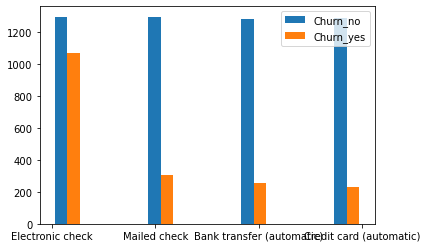

In [72]:
PaymentMeth_churn_no = df[df.Churn=='No'].PaymentMethod
PaymentMeth_churn_yes = df[df.Churn=='Yes'].PaymentMethod
plt.hist([PaymentMeth_churn_no,PaymentMeth_churn_yes] ,label = ['Churn_no', 'Churn_yes'])
plt.legend()

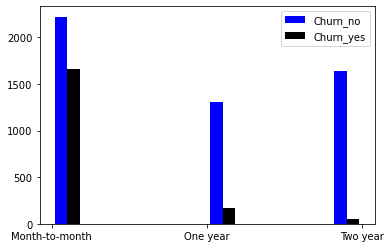

In [74]:
contract_churn_no = df[df.Churn=='No'].Contract
contract_churn_yes = df[df.Churn=='Yes'].Contract
plt.hist([contract_churn_no,contract_churn_yes] ,color = ['blue','black'],label = ['Churn_no', 'Churn_yes'])
plt.legend()

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

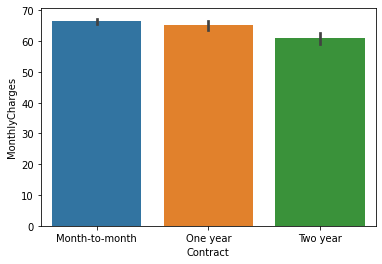

In [77]:
sns.barplot(x='Contract', y='MonthlyCharges', data=df)



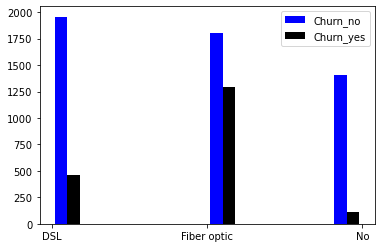

In [79]:
netserv_churn_no = df[df.Churn=='No'].InternetService
netserv_churn_yes = df[df.Churn=='Yes'].InternetService
plt.hist([netserv_churn_no,netserv_churn_yes] ,color = ['blue','black'],label = ['Churn_no', 'Churn_yes'])
plt.legend()

In [10]:
#checking for outliers
min_thresh_totcharge, max_thresh_totcharge = df.TotalCharges.quantile([0.01,0.99])
min_thresh_tenure, max_thresh_tenure = df.tenure.quantile([0.01,0.99])

In [11]:
min_thresh_totcharge, max_thresh_totcharge

(19.9, 8039.882999999998)

In [12]:
df[(df['TotalCharges'] > max_thresh_totcharge) & (df['TotalCharges'] < min_thresh_totcharge)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
min_thresh_tenure, max_thresh_tenure

(1.0, 72.0)

In [14]:
df[(df['tenure'] > max_thresh_tenure) & (df['tenure'] < min_thresh_tenure)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [16]:
for column in df:
    print(f'{column} : {df[column].unique()}')               #getting unique values in each column

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [17]:
df['gender'].replace({'Female' : 1 , 'Male' : 0}, inplace = True)

In [18]:
df['Partner'].replace({'Yes': 1,'No': 0}, inplace = True)

In [19]:
df['Dependents'].replace({'Yes': 1,'No': 0}, inplace = True)


In [20]:
df['PhoneService'].replace({'Yes': 1,'No': 0}, inplace = True)
df['MultipleLines'].replace({'Yes': 1,'No': 0, 'No phone service' : 0}, inplace = True)
df['OnlineSecurity'].replace({'Yes': 1,'No': 0, 'No internet service' : 0}, inplace = True)
df['OnlineBackup'].replace({'Yes': 1,'No': 0, 'No internet service' : 0}, inplace = True)
df['DeviceProtection'].replace({'Yes': 1,'No': 0, 'No internet service' : 0}, inplace = True)
df['TechSupport'].replace({'Yes': 1,'No': 0, 'No internet service' : 0}, inplace = True)
df['StreamingTV'].replace({'Yes': 1,'No': 0, 'No internet service' : 0}, inplace = True)
df['StreamingMovies'].replace({'Yes': 1,'No': 0, 'No internet service' : 0}, inplace = True)
df['PaperlessBilling'].replace({'Yes': 1,'No': 0}, inplace = True)
df['Churn'].replace({'Yes':1, 'No': 0}, inplace = True)

In [21]:
for column in df:
    print(f'{column} : {df[column].unique()}')  

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [22]:
df_new = pd.get_dummies(data = df, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [23]:
#df_new = df_new.drop(['InternetService_No','Contract_Month-to-month','PaymentMethod_Bank transfer (automatic)'], axis = 1)

In [24]:
#df_new.head()

In [25]:
#Scaling the data
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_new[cols_to_scale] = scaler.fit_transform(df_new[cols_to_scale])

In [26]:
df_new.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3672,1,0,1,0,0.746479,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1172,1,1,1,1,0.436620,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4025,0,0,0,0,0.042254,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
781,1,0,1,1,0.056338,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
89,0,0,1,0,0.394366,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [27]:
corr = df_new.corr()

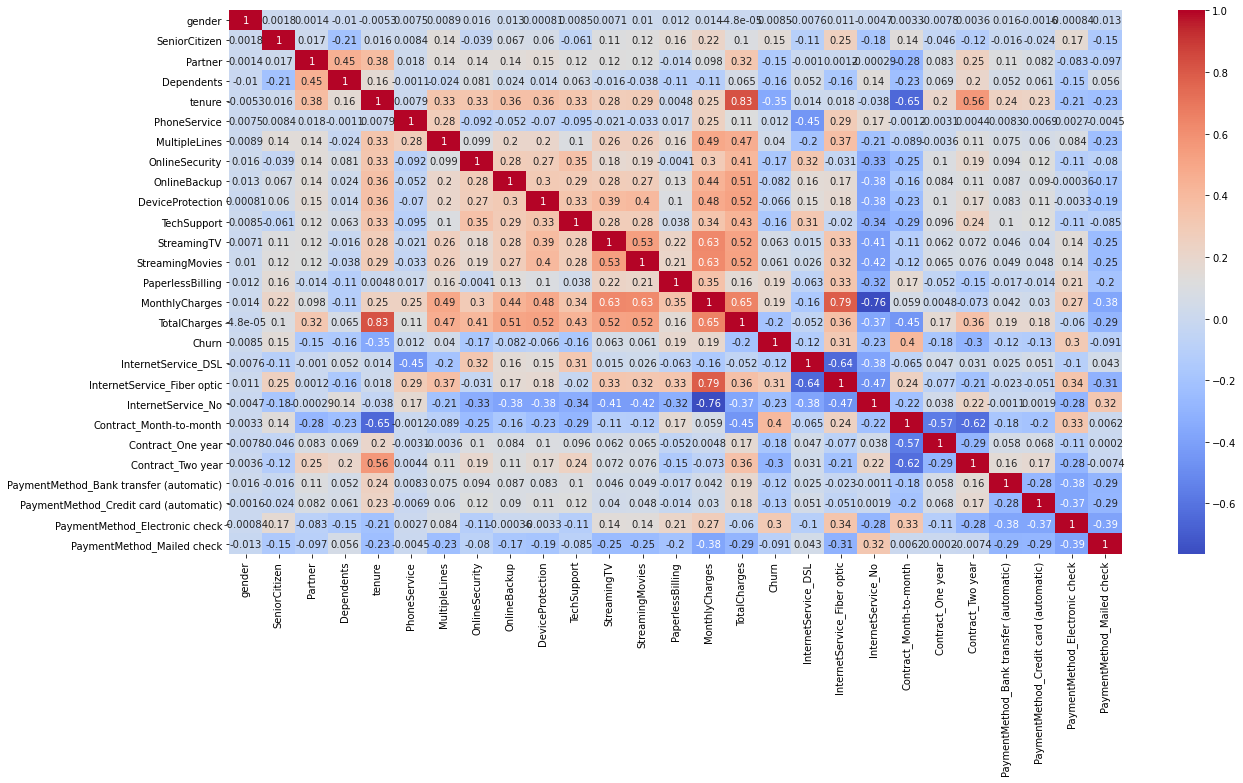

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

In [29]:
corr[abs(corr['Churn']) > 0.1].index

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'TechSupport', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [30]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [31]:
X = df_new.drop('Churn', axis = 'columns')

In [32]:
y = df_new['Churn']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.43, random_state = 5)

In [34]:
X_train.shape

(4008, 26)

In [35]:
X_test.shape

(3024, 26)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2178
           1       0.65      0.54      0.59       846

    accuracy                           0.79      3024
   macro avg       0.74      0.71      0.72      3024
weighted avg       0.78      0.79      0.78      3024



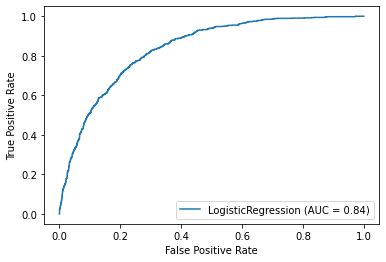

In [36]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
prediction_lr = logistic.predict(X_test)
print(classification_report(y_test,prediction_lr))
metrics.plot_roc_curve(logistic, X_test, y_test)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction_lr)

array([[1938,  240],
       [ 392,  454]], dtype=int64)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2178
           1       0.50      0.50      0.50       846

    accuracy                           0.72      3024
   macro avg       0.65      0.65      0.65      3024
weighted avg       0.72      0.72      0.72      3024



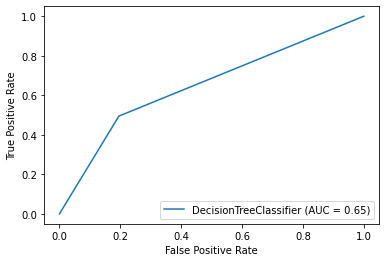

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
prediction_dt = tree.predict(X_test)
print(classification_report(y_test, prediction_dt))
metrics.plot_roc_curve(tree, X_test, y_test)

In [39]:
confusion_matrix(y_test,prediction_dt)

array([[1752,  426],
       [ 427,  419]], dtype=int64)

In [40]:
#model fitting using Neural Network
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 4000)


Epoch 1/4000
126/126 [==============================] - 1s 1ms/step - loss: 0.5942 - accuracy: 0.6754
Epoch 2/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.7814
Epoch 3/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.7933
Epoch 4/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.7940
Epoch 5/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8157
Epoch 6/4000
126/126 [==============================] - 0s 944us/step - loss: 0.4043 - accuracy: 0.8139
Epoch 7/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.8126
Epoch 8/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8079
Epoch 9/4000
126/126 [==============================] - 0s 946us/step - loss: 0.3974 - accuracy: 0.8119
Epoch 10/4000
126/126 [==============================] - 0s 1ms/step - loss: 0

126/126 [==============================] - 0s 636us/step - loss: 0.3634 - accuracy: 0.8266
Epoch 80/4000
126/126 [==============================] - 0s 676us/step - loss: 0.3556 - accuracy: 0.8352
Epoch 81/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8358
Epoch 82/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8390
Epoch 83/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8469
Epoch 84/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8462
Epoch 85/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8435
Epoch 86/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8331
Epoch 87/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8369
Epoch 88/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3670

126/126 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8557
Epoch 158/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8433
Epoch 159/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8553
Epoch 160/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8366
Epoch 161/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3305 - accuracy: 0.8372
Epoch 162/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8511
Epoch 163/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8482
Epoch 164/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8400
Epoch 165/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8441
Epoch 166/4000
126/126 [==============================] - 0s 1ms/step - loss: 0

126/126 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8546
Epoch 236/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8556
Epoch 237/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3013 - accuracy: 0.8613
Epoch 238/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8599
Epoch 239/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8603
Epoch 240/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2983 - accuracy: 0.8635
Epoch 241/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3101 - accuracy: 0.8614
Epoch 242/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8461
Epoch 243/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8613
Epoch 244/4000
126/126 [==============================] - 0s 2ms/step - loss: 0

126/126 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.8676
Epoch 314/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.8679
Epoch 315/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2873 - accuracy: 0.8658
Epoch 316/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8564
Epoch 317/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8600
Epoch 318/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8584
Epoch 319/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8663
Epoch 320/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8725
Epoch 321/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8730
Epoch 322/4000
126/126 [==============================] - 0s 2ms/step - loss: 0

126/126 [==============================] - 0s 1ms/step - loss: 0.2760 - accuracy: 0.8727
Epoch 392/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.8737
Epoch 393/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2854 - accuracy: 0.8692
Epoch 394/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.8752
Epoch 395/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.8711
Epoch 396/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2690 - accuracy: 0.8765
Epoch 397/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2782 - accuracy: 0.8714
Epoch 398/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2680 - accuracy: 0.8763
Epoch 399/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2783 - accuracy: 0.8718
Epoch 400/4000
126/126 [==============================] - 0s 2ms/step - loss: 0

126/126 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8754
Epoch 470/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8747
Epoch 471/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.8759
Epoch 472/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.8708
Epoch 473/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8794
Epoch 474/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.8725
Epoch 475/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.8831
Epoch 476/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.8776
Epoch 477/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.8865
Epoch 478/4000
126/126 [==============================] - 0s 938us/step - loss:

126/126 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.8759
Epoch 548/4000
126/126 [==============================] - 0s 647us/step - loss: 0.2624 - accuracy: 0.8771
Epoch 549/4000
126/126 [==============================] - 0s 635us/step - loss: 0.2561 - accuracy: 0.8818
Epoch 550/4000
126/126 [==============================] - 0s 664us/step - loss: 0.2589 - accuracy: 0.8781
Epoch 551/4000
126/126 [==============================] - 0s 735us/step - loss: 0.2655 - accuracy: 0.8830
Epoch 552/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2669 - accuracy: 0.8813
Epoch 553/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.8787
Epoch 554/4000
126/126 [==============================] - 0s 958us/step - loss: 0.2545 - accuracy: 0.8825
Epoch 555/4000
126/126 [==============================] - 0s 689us/step - loss: 0.2681 - accuracy: 0.8728
Epoch 556/4000
126/126 [==============================] - 0s 1ms/st

126/126 [==============================] - 0s 1ms/step - loss: 0.2536 - accuracy: 0.8844
Epoch 626/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.8724
Epoch 627/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 0.8829
Epoch 628/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 0.8741
Epoch 629/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.8806
Epoch 630/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.8857
Epoch 631/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.8848
Epoch 632/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2558 - accuracy: 0.8798
Epoch 633/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.8886
Epoch 634/4000
126/126 [==============================] - 0s 1ms/step - loss: 0

126/126 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.8919
Epoch 704/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.8846
Epoch 705/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.8863
Epoch 706/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2463 - accuracy: 0.8882
Epoch 707/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 0.8799
Epoch 708/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.8836
Epoch 709/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.8795
Epoch 710/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.8876
Epoch 711/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.8896
Epoch 712/4000
126/126 [==============================] - 0s 1ms/step - loss: 0

126/126 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.8915
Epoch 782/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.8885
Epoch 783/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.8875
Epoch 784/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.8819
Epoch 785/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.8840
Epoch 786/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8843
Epoch 787/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.8908
Epoch 788/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2383 - accuracy: 0.8856
Epoch 789/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.8904
Epoch 790/4000
126/126 [==============================] - 0s 2ms/step - loss: 0

126/126 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.8934
Epoch 860/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.8924
Epoch 861/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2341 - accuracy: 0.8913
Epoch 862/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.8919
Epoch 863/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.8865
Epoch 864/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.8831
Epoch 865/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2385 - accuracy: 0.8897
Epoch 866/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2422 - accuracy: 0.8918
Epoch 867/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2413 - accuracy: 0.8913
Epoch 868/4000
126/126 [==============================] - 0s 1ms/step - loss: 0

126/126 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.8824
Epoch 938/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.8898
Epoch 939/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.8872
Epoch 940/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.8855
Epoch 941/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8846
Epoch 942/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.8855
Epoch 943/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2436 - accuracy: 0.8807
Epoch 944/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2402 - accuracy: 0.8899
Epoch 945/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2358 - accuracy: 0.8940
Epoch 946/4000
126/126 [==============================] - 0s 1ms/step - loss: 0

126/126 [==============================] - 0s 1ms/step - loss: 0.2408 - accuracy: 0.8891
Epoch 1016/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2342 - accuracy: 0.8927
Epoch 1017/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.8888
Epoch 1018/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.8888
Epoch 1019/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.8953
Epoch 1020/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.8911
Epoch 1021/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.8987
Epoch 1022/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2239 - accuracy: 0.9007
Epoch 1023/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.8957
Epoch 1024/4000
126/126 [==============================] - 0s 1ms/step 

126/126 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.8886
Epoch 1093/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.8965
Epoch 1094/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.8952
Epoch 1095/4000
126/126 [==============================] - 0s 998us/step - loss: 0.2349 - accuracy: 0.8938
Epoch 1096/4000
126/126 [==============================] - 0s 980us/step - loss: 0.2439 - accuracy: 0.8835
Epoch 1097/4000
126/126 [==============================] - 0s 646us/step - loss: 0.2429 - accuracy: 0.8898
Epoch 1098/4000
126/126 [==============================] - 0s 733us/step - loss: 0.2273 - accuracy: 0.9013
Epoch 1099/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.8898
Epoch 1100/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2374 - accuracy: 0.8901
Epoch 1101/4000
126/126 [==============================] - 0s 1

126/126 [==============================] - 0s 1ms/step - loss: 0.2173 - accuracy: 0.9018
Epoch 1170/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.8984
Epoch 1171/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.8848
Epoch 1172/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.8919
Epoch 1173/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2269 - accuracy: 0.8968
Epoch 1174/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.8963
Epoch 1175/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.8889
Epoch 1176/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.8962
Epoch 1177/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.8952
Epoch 1178/4000
126/126 [==============================] - 0s 2ms/step 

126/126 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.8967
Epoch 1248/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2185 - accuracy: 0.9033
Epoch 1249/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2326 - accuracy: 0.8912
Epoch 1250/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2391 - accuracy: 0.8867
Epoch 1251/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.8957
Epoch 1252/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.8897
Epoch 1253/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2306 - accuracy: 0.8961
Epoch 1254/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2286 - accuracy: 0.8938
Epoch 1255/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.8923
Epoch 1256/4000
126/126 [==============================] - 0s 2ms/step 

Epoch 1325/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.8953
Epoch 1326/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.8923
Epoch 1327/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.8974
Epoch 1328/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2341 - accuracy: 0.8948
Epoch 1329/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2218 - accuracy: 0.9005
Epoch 1330/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.8952
Epoch 1331/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2309 - accuracy: 0.8888
Epoch 1332/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 0.8960
Epoch 1333/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.8876
Epoch 1334/4000
126/126 [==============================

Epoch 1403/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2249 - accuracy: 0.8914
Epoch 1404/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2173 - accuracy: 0.8969
Epoch 1405/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2063 - accuracy: 0.9123
Epoch 1406/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2112 - accuracy: 0.9115
Epoch 1407/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2163 - accuracy: 0.8946
Epoch 1408/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2221 - accuracy: 0.8978
Epoch 1409/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 0.8928
Epoch 1410/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2275 - accuracy: 0.8977
Epoch 1411/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.8937
Epoch 1412/4000
126/126 [==============================

126/126 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9045
Epoch 1481/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9117
Epoch 1482/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9043
Epoch 1483/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.8976
Epoch 1484/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2169 - accuracy: 0.9021
Epoch 1485/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.8991
Epoch 1486/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2098 - accuracy: 0.9093
Epoch 1487/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2215 - accuracy: 0.9017
Epoch 1488/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.9001
Epoch 1489/4000
126/126 [==============================] - 0s 1ms/step 

126/126 [==============================] - 0s 1ms/step - loss: 0.2114 - accuracy: 0.8990
Epoch 1559/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.8915
Epoch 1560/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2124 - accuracy: 0.9096
Epoch 1561/4000
126/126 [==============================] - 0s 905us/step - loss: 0.2175 - accuracy: 0.9036
Epoch 1562/4000
126/126 [==============================] - 0s 863us/step - loss: 0.2138 - accuracy: 0.8996
Epoch 1563/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2233 - accuracy: 0.8981
Epoch 1564/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9080
Epoch 1565/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.9036
Epoch 1566/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.8986
Epoch 1567/4000
126/126 [==============================] - 0s 2ms/s

126/126 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9048
Epoch 1636/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9133
Epoch 1637/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.8981
Epoch 1638/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.8971
Epoch 1639/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9046
Epoch 1640/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.8994
Epoch 1641/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2121 - accuracy: 0.9019
Epoch 1642/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2164 - accuracy: 0.8992
Epoch 1643/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.8979
Epoch 1644/4000
126/126 [==============================] - 0s 2ms/step 

Epoch 1713/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9083
Epoch 1714/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.8966
Epoch 1715/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9104
Epoch 1716/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 0.9064
Epoch 1717/4000
126/126 [==============================] - 0s 818us/step - loss: 0.2048 - accuracy: 0.9068
Epoch 1718/4000
126/126 [==============================] - 0s 849us/step - loss: 0.2144 - accuracy: 0.8992
Epoch 1719/4000
126/126 [==============================] - 0s 827us/step - loss: 0.2220 - accuracy: 0.8975
Epoch 1720/4000
126/126 [==============================] - 0s 771us/step - loss: 0.2061 - accuracy: 0.9054
Epoch 1721/4000
126/126 [==============================] - 0s 856us/step - loss: 0.2041 - accuracy: 0.9070
Epoch 1722/4000
126/126 [====================

126/126 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9015
Epoch 1791/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1989 - accuracy: 0.9119
Epoch 1792/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.8960
Epoch 1793/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9087
Epoch 1794/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9130
Epoch 1795/4000
126/126 [==============================] - 0s 712us/step - loss: 0.2086 - accuracy: 0.9036
Epoch 1796/4000
126/126 [==============================] - 0s 683us/step - loss: 0.1990 - accuracy: 0.9167
Epoch 1797/4000
126/126 [==============================] - 0s 658us/step - loss: 0.2196 - accuracy: 0.9005
Epoch 1798/4000
126/126 [==============================] - 0s 679us/step - loss: 0.2110 - accuracy: 0.9096
Epoch 1799/4000
126/126 [==============================] - 0s 1

Epoch 1868/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2056 - accuracy: 0.9081
Epoch 1869/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9063
Epoch 1870/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2130 - accuracy: 0.9007
Epoch 1871/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9036
Epoch 1872/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9026
Epoch 1873/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9125
Epoch 1874/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9065
Epoch 1875/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9018
Epoch 1876/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9043
Epoch 1877/4000
126/126 [==============================

126/126 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9035
Epoch 1946/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9078
Epoch 1947/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9108
Epoch 1948/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9029
Epoch 1949/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9091
Epoch 1950/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.9173
Epoch 1951/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9087
Epoch 1952/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9140
Epoch 1953/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9076
Epoch 1954/4000
126/126 [==============================] - 0s 2ms/step 

126/126 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9105
Epoch 2023/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9107
Epoch 2024/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9135
Epoch 2025/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9111
Epoch 2026/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9095
Epoch 2027/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9061
Epoch 2028/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2001 - accuracy: 0.9047
Epoch 2029/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1920 - accuracy: 0.9158
Epoch 2030/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.9061
Epoch 2031/4000
126/126 [==============================] - 0s 1ms/step 

126/126 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9080
Epoch 2101/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9089
Epoch 2102/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9061
Epoch 2103/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9068
Epoch 2104/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9110
Epoch 2105/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9103
Epoch 2106/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9134
Epoch 2107/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9145
Epoch 2108/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9110
Epoch 2109/4000
126/126 [==============================] - 0s 2ms/step 

126/126 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.8986
Epoch 2178/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9052
Epoch 2179/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9188
Epoch 2180/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9125
Epoch 2181/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9131
Epoch 2182/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9164
Epoch 2183/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9154
Epoch 2184/4000
126/126 [==============================] - 0s 948us/step - loss: 0.2080 - accuracy: 0.9086
Epoch 2185/4000
126/126 [==============================] - 0s 711us/step - loss: 0.2075 - accuracy: 0.9072
Epoch 2186/4000
126/126 [==============================] - 0s 617us

126/126 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.9131
Epoch 2255/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9033
Epoch 2256/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1965 - accuracy: 0.9113
Epoch 2257/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2022 - accuracy: 0.9086
Epoch 2258/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9132
Epoch 2259/4000
126/126 [==============================] - 0s 715us/step - loss: 0.1957 - accuracy: 0.9065
Epoch 2260/4000
126/126 [==============================] - 0s 654us/step - loss: 0.2024 - accuracy: 0.9077
Epoch 2261/4000
126/126 [==============================] - 0s 738us/step - loss: 0.2003 - accuracy: 0.9095
Epoch 2262/4000
126/126 [==============================] - 0s 728us/step - loss: 0.2005 - accuracy: 0.9055
Epoch 2263/4000
126/126 [==============================] - 0s 6

126/126 [==============================] - 0s 1ms/step - loss: 0.1823 - accuracy: 0.9268
Epoch 2332/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2042 - accuracy: 0.9153
Epoch 2333/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2007 - accuracy: 0.9138
Epoch 2334/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9097
Epoch 2335/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9036
Epoch 2336/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9168
Epoch 2337/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9145
Epoch 2338/4000
126/126 [==============================] - 0s 646us/step - loss: 0.1993 - accuracy: 0.9118
Epoch 2339/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1926 - accuracy: 0.9129
Epoch 2340/4000
126/126 [==============================] - 0s 959us/s

126/126 [==============================] - 0s 892us/step - loss: 0.1884 - accuracy: 0.9175
Epoch 2409/4000
126/126 [==============================] - 0s 691us/step - loss: 0.2089 - accuracy: 0.9045
Epoch 2410/4000
126/126 [==============================] - 0s 945us/step - loss: 0.2025 - accuracy: 0.9068
Epoch 2411/4000
126/126 [==============================] - 0s 669us/step - loss: 0.1938 - accuracy: 0.9169
Epoch 2412/4000
126/126 [==============================] - 0s 919us/step - loss: 0.1919 - accuracy: 0.9133
Epoch 2413/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1932 - accuracy: 0.9117
Epoch 2414/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1924 - accuracy: 0.9128
Epoch 2415/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9093
Epoch 2416/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.9126
Epoch 2417/4000
126/126 [==============================] - 0s

126/126 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.9172
Epoch 2486/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1859 - accuracy: 0.9238
Epoch 2487/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1859 - accuracy: 0.9193
Epoch 2488/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.9180
Epoch 2489/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1983 - accuracy: 0.9094
Epoch 2490/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.9069
Epoch 2491/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1907 - accuracy: 0.9138
Epoch 2492/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.9097
Epoch 2493/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9145
Epoch 2494/4000
126/126 [==============================] - 0s 2ms/step 

126/126 [==============================] - 0s 1ms/step - loss: 0.2012 - accuracy: 0.9086
Epoch 2564/4000
126/126 [==============================] - ETA: 0s - loss: 0.2031 - accuracy: 0.91 - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9123
Epoch 2565/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1951 - accuracy: 0.9139
Epoch 2566/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2067 - accuracy: 0.9045
Epoch 2567/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1976 - accuracy: 0.9123
Epoch 2568/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1865 - accuracy: 0.9187
Epoch 2569/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1972 - accuracy: 0.9088
Epoch 2570/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1822 - accuracy: 0.9197
Epoch 2571/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1851 - accuracy: 0.9067
Epoch 2572/4000
126/126 [====

126/126 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9138
Epoch 2641/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9160
Epoch 2642/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9105
Epoch 2643/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.8960
Epoch 2644/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9211
Epoch 2645/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9103
Epoch 2646/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1882 - accuracy: 0.9155
Epoch 2647/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.9075
Epoch 2648/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1923 - accuracy: 0.9160
Epoch 2649/4000
126/126 [==============================] - 0s 1ms/step 

Epoch 2718/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1902 - accuracy: 0.9120
Epoch 2719/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1953 - accuracy: 0.9093
Epoch 2720/4000
126/126 [==============================] - 0s 767us/step - loss: 0.2031 - accuracy: 0.9031
Epoch 2721/4000
126/126 [==============================] - 0s 737us/step - loss: 0.1870 - accuracy: 0.9170
Epoch 2722/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.9128
Epoch 2723/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1843 - accuracy: 0.9256
Epoch 2724/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1926 - accuracy: 0.9147
Epoch 2725/4000
126/126 [==============================] - 0s 995us/step - loss: 0.1880 - accuracy: 0.9177
Epoch 2726/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1951 - accuracy: 0.9172
Epoch 2727/4000
126/126 [========================

126/126 [==============================] - 0s 1ms/step - loss: 0.1779 - accuracy: 0.9182
Epoch 2796/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9148
Epoch 2797/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1798 - accuracy: 0.9184
Epoch 2798/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.9103
Epoch 2799/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9071
Epoch 2800/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9077
Epoch 2801/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9121
Epoch 2802/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.9031
Epoch 2803/4000
126/126 [==============================] - 0s 717us/step - loss: 0.1878 - accuracy: 0.9135
Epoch 2804/4000
126/126 [==============================] - 0s 667us/s

126/126 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9156
Epoch 2873/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9127
Epoch 2874/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9106
Epoch 2875/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9112
Epoch 2876/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9123
Epoch 2877/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.9165
Epoch 2878/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.9233
Epoch 2879/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1840 - accuracy: 0.9213
Epoch 2880/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1917 - accuracy: 0.9162
Epoch 2881/4000
126/126 [==============================] - 0s 1ms/step 

126/126 [==============================] - 0s 2ms/step - loss: 0.1866 - accuracy: 0.9143
Epoch 2950/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9130
Epoch 2951/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9074
Epoch 2952/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.9179
Epoch 2953/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1858 - accuracy: 0.9221
Epoch 2954/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1981 - accuracy: 0.9027
Epoch 2955/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.9208
Epoch 2956/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1910 - accuracy: 0.9154
Epoch 2957/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1815 - accuracy: 0.9218
Epoch 2958/4000
126/126 [==============================] - 0s 2ms/step 

126/126 [==============================] - 0s 1ms/step - loss: 0.2009 - accuracy: 0.9050
Epoch 3028/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.9143
Epoch 3029/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1883 - accuracy: 0.9131
Epoch 3030/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1788 - accuracy: 0.9235
Epoch 3031/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9200
Epoch 3032/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1804 - accuracy: 0.9199
Epoch 3033/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9140
Epoch 3034/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.2064 - accuracy: 0.9119
Epoch 3035/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9189
Epoch 3036/4000
126/126 [==============================] - 0s 2ms/step 

126/126 [==============================] - 0s 1ms/step - loss: 0.1869 - accuracy: 0.9176
Epoch 3106/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1908 - accuracy: 0.9132
Epoch 3107/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1904 - accuracy: 0.9148
Epoch 3108/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9173
Epoch 3109/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9073
Epoch 3110/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9136
Epoch 3111/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1827 - accuracy: 0.9195
Epoch 3112/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1825 - accuracy: 0.9217
Epoch 3113/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1912 - accuracy: 0.9142
Epoch 3114/4000
126/126 [==============================] - 0s 2ms/step 

126/126 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9268
Epoch 3184/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1844 - accuracy: 0.9173
Epoch 3185/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9205
Epoch 3186/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.9081
Epoch 3187/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9241
Epoch 3188/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9193
Epoch 3189/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1881 - accuracy: 0.9183
Epoch 3190/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1908 - accuracy: 0.9188
Epoch 3191/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1825 - accuracy: 0.9169
Epoch 3192/4000
126/126 [==============================] - 0s 1ms/step 

126/126 [==============================] - 0s 952us/step - loss: 0.1664 - accuracy: 0.9290
Epoch 3262/4000
126/126 [==============================] - 0s 756us/step - loss: 0.1842 - accuracy: 0.9219
Epoch 3263/4000
126/126 [==============================] - 0s 688us/step - loss: 0.1880 - accuracy: 0.9181
Epoch 3264/4000
126/126 [==============================] - 0s 723us/step - loss: 0.1798 - accuracy: 0.9247
Epoch 3265/4000
126/126 [==============================] - 0s 719us/step - loss: 0.1941 - accuracy: 0.9111
Epoch 3266/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1927 - accuracy: 0.9158
Epoch 3267/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9158
Epoch 3268/4000
126/126 [==============================] - 0s 697us/step - loss: 0.1881 - accuracy: 0.9204
Epoch 3269/4000
126/126 [==============================] - 0s 706us/step - loss: 0.1874 - accuracy: 0.9201
Epoch 3270/4000
126/126 [==============================] 

126/126 [==============================] - 0s 1ms/step - loss: 0.1756 - accuracy: 0.9249
Epoch 3339/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1918 - accuracy: 0.9168
Epoch 3340/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9175
Epoch 3341/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9116
Epoch 3342/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9185
Epoch 3343/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9155
Epoch 3344/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9169
Epoch 3345/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9208
Epoch 3346/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9328
Epoch 3347/4000
126/126 [==============================] - 0s 1ms/step 

126/126 [==============================] - 0s 779us/step - loss: 0.1776 - accuracy: 0.9248
Epoch 3416/4000
126/126 [==============================] - 0s 767us/step - loss: 0.1827 - accuracy: 0.9215
Epoch 3417/4000
126/126 [==============================] - 0s 771us/step - loss: 0.1807 - accuracy: 0.9242
Epoch 3418/4000
126/126 [==============================] - 0s 756us/step - loss: 0.1904 - accuracy: 0.9119
Epoch 3419/4000
126/126 [==============================] - 0s 788us/step - loss: 0.1828 - accuracy: 0.9204
Epoch 3420/4000
126/126 [==============================] - 0s 765us/step - loss: 0.2016 - accuracy: 0.9073
Epoch 3421/4000
126/126 [==============================] - 0s 733us/step - loss: 0.1950 - accuracy: 0.9155
Epoch 3422/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.9178
Epoch 3423/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9283
Epoch 3424/4000
126/126 [==============================] 

126/126 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.9214
Epoch 3493/4000
126/126 [==============================] - 0s 999us/step - loss: 0.1780 - accuracy: 0.9189
Epoch 3494/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1868 - accuracy: 0.9113
Epoch 3495/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1782 - accuracy: 0.9238
Epoch 3496/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1811 - accuracy: 0.9221
Epoch 3497/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.9277
Epoch 3498/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.9221
Epoch 3499/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1823 - accuracy: 0.9203
Epoch 3500/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1911 - accuracy: 0.9158
Epoch 3501/4000
126/126 [==============================] - 0s 1ms/ste

126/126 [==============================] - 0s 1ms/step - loss: 0.1786 - accuracy: 0.9217
Epoch 3570/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1776 - accuracy: 0.9224
Epoch 3571/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9268
Epoch 3572/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9224
Epoch 3573/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.9227
Epoch 3574/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9258
Epoch 3575/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9248
Epoch 3576/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.9207
Epoch 3577/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1789 - accuracy: 0.9271
Epoch 3578/4000
126/126 [==============================] - 0s 2ms/step 

126/126 [==============================] - 0s 1ms/step - loss: 0.1776 - accuracy: 0.9230
Epoch 3648/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1721 - accuracy: 0.9294
Epoch 3649/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9107
Epoch 3650/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1748 - accuracy: 0.9223
Epoch 3651/4000
126/126 [==============================] - 0s 962us/step - loss: 0.1699 - accuracy: 0.9267
Epoch 3652/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9198
Epoch 3653/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1753 - accuracy: 0.9184
Epoch 3654/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1763 - accuracy: 0.9202
Epoch 3655/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1851 - accuracy: 0.9164
Epoch 3656/4000
126/126 [==============================] - 0s 1ms/ste

126/126 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.9192
Epoch 3725/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.9222
Epoch 3726/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1863 - accuracy: 0.9187
Epoch 3727/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1732 - accuracy: 0.9186
Epoch 3728/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9234
Epoch 3729/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9251
Epoch 3730/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9207
Epoch 3731/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1772 - accuracy: 0.9240
Epoch 3732/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1590 - accuracy: 0.9240
Epoch 3733/4000
126/126 [==============================] - 0s 2ms/step 

126/126 [==============================] - 0s 1ms/step - loss: 0.1788 - accuracy: 0.9237
Epoch 3802/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1711 - accuracy: 0.9223
Epoch 3803/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1806 - accuracy: 0.9231
Epoch 3804/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.9245
Epoch 3805/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1698 - accuracy: 0.9216
Epoch 3806/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1630 - accuracy: 0.9239
Epoch 3807/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1780 - accuracy: 0.9225
Epoch 3808/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1743 - accuracy: 0.9254
Epoch 3809/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1801 - accuracy: 0.9214
Epoch 3810/4000
126/126 [==============================] - 0s 1ms/step 

126/126 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9229
Epoch 3880/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9268
Epoch 3881/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1689 - accuracy: 0.9197
Epoch 3882/4000
126/126 [==============================] - 0s 677us/step - loss: 0.1720 - accuracy: 0.9254
Epoch 3883/4000
126/126 [==============================] - 0s 695us/step - loss: 0.1960 - accuracy: 0.9139
Epoch 3884/4000
126/126 [==============================] - 0s 623us/step - loss: 0.1643 - accuracy: 0.9317
Epoch 3885/4000
126/126 [==============================] - 0s 645us/step - loss: 0.1708 - accuracy: 0.9234
Epoch 3886/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.9199
Epoch 3887/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.9210
Epoch 3888/4000
126/126 [==============================] - 0s 1

Epoch 3957/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.9205
Epoch 3958/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9261
Epoch 3959/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9207
Epoch 3960/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9168
Epoch 3961/4000
126/126 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9234
Epoch 3962/4000
126/126 [==============================] - 0s 853us/step - loss: 0.1680 - accuracy: 0.9282
Epoch 3963/4000
126/126 [==============================] - 0s 800us/step - loss: 0.1653 - accuracy: 0.9300
Epoch 3964/4000
126/126 [==============================] - 0s 778us/step - loss: 0.1671 - accuracy: 0.9286
Epoch 3965/4000
126/126 [==============================] - 0s 725us/step - loss: 0.1798 - accuracy: 0.9199
Epoch 3966/4000
126/126 [======================

In [41]:
model.evaluate(X_test, y_test)

95/95 [==============================] - 0s 845us/step - loss: 1.6121 - accuracy: 0.7321


[1.6120566129684448, 0.7321428656578064]

In [42]:
prediction_nn = model.predict(X_test)

In [43]:
prediction_nn[0:10]

array([[2.8451057e-05],
       [2.5969148e-03],
       [1.2571938e-07],
       [1.0000000e+00],
       [2.6026368e-04],
       [9.9998605e-01],
       [1.8380582e-03],
       [9.9928200e-01],
       [3.3167899e-02],
       [1.4563292e-02]], dtype=float32)

In [44]:
y_test[0:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [45]:
# only if we want to classify into yes/no and dont want the probabilities of churning

predicted_y = []   
for i in prediction_nn:
    if i > 0.5:
        predicted_y.append(1)
    else:
        predicted_y.append(0)
        

In [46]:
predicted_y[0:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [47]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      2178
           1       0.52      0.51      0.51       846

    accuracy                           0.73      3024
   macro avg       0.67      0.66      0.66      3024
weighted avg       0.73      0.73      0.73      3024



In [48]:
confusion_matrix(y_test,predicted_y)

array([[1784,  394],
       [ 416,  430]], dtype=int64)